In [555]:
from dm_control import mjcf,mujoco
import PIL.Image

In [565]:
sort_task=mjcf.RootElement(model='sort_task')
sort_task.compiler.angle="radian"
sort_task.compiler.autolimits="true"

In [566]:
sort_task.visual.headlight.diffuse="0.6 0.6 0.6"
sort_task.visual.headlight.ambient="0.1 0.1 0.1"
sort_task.visual.headlight.specular="0 0 0"
sort_task.visual.__getattr__('global').azimuth="120"
sort_task.visual.__getattr__('global').elevation="-30"
sort_task.visual.__getattr__('global').offwidth="1000"
sort_task.visual.__getattr__('global').offheight="1000"
sort_task.visual.quality.shadowsize="4096"

In [567]:
light_wood_texture=sort_task.asset.add('texture',file='assets/objects/textures/light-wood.png',type="2d",name='tex-light-wood')
light_wood=sort_task.asset.add('material',name='light-wood',reflectance=0.2,texrepeat="15 15",texture='tex-light-wood',texuniform='true')
chequered = sort_task.asset.add('texture', type='2d', builtin='checker', width=300, height=300, rgb1=[.2, .3, .4], rgb2=[.3, .4, .5])
groundplane = sort_task.asset.add('material', name='grid', texture=chequered, texrepeat=[2, 2], reflectance=.2)


#print(sort_task.to_xml_string())

In [568]:
light_wood_texture

MJCF Element: <texture name="tex-light-wood" type="2d" file="light-wood-a6ff1939d252352fdd445e40387323d19bd19f4c.png"/>

In [569]:
sort_task.worldbody.add('light',pos="0 0 1.5",dir="0 0 -1",directional="true")
sort_task.worldbody.add('geom',name="floor",pos="0 0 -0.5",size="0 0 0.05", type="plane",material=groundplane)
#panda=mjcf.from_path('/home/vignesh/robot-collab_vig/rocobench/envs/assets/panda/panda.xml')
#sort_task.worldbody.attach(panda)
table_body=sort_task.worldbody.add('body',name='table',pos='0 0.5 0')
table_body.add('geom',name='table_collision',pos='0 0 0.1',size='1.6 0.4 0.05', type='box', group='0', friction='1 0.5 0.0001',rgba='1 1 1 1')

table_top_body=table_body.add('body',name='table_top',pos='0 0 0.1')
table_top_body.add('geom',name='table_top',size='1.6 0.4 0.05',type='box',conaffinity='0',contype='0', group='1',rgba='1 1 1 1')

robot1_site=sort_task.worldbody.add('site',name='robot1',pos='-0.5 0.2 -0.5')
robot2_site=sort_task.worldbody.add('site',name='robot2',pos='0.5 0.2 -0.5')

robot1=mjcf.from_path('/home/vignesh/robot-collab_vig/rocobench/envs/assets/panda/panda.xml')
robot2=mjcf.from_path('/home/vignesh/robot-collab_vig/rocobench/envs/assets/panda/panda.xml')

robot1_site.attach(robot1)
robot2_site.attach(robot2)
#table_body.add('geom',name='table_left',pos='-1.63 0 1', size='0.02 1.6 1.5', rgba='1 1 1 0', type='box')
#table_body.add('geom',name='table_right',pos='1.63 0 1', size='0.02 1.6 1.5', rgba='1 1 1 0', type='box')
#table_body.add('geom',name='table_front',pos='0 1.63 1', size='1.7 0.02 1.5', rgba='1 1 1 0', type='box')
#table_body.add('geom',name='table_back',pos='0 -1.63 1', size='1.7 0.02 1.5', rgba='1 1 1 0', type='box')

MJCF Element: <body pos="0.5 0.20000000000000001 -0.5" name="panda_1/">...</body>

In [570]:
bin_body1=table_top_body.add('body',name='bin1',pos='-0.5 0 0.05')
bin_body1.add('geom',name='bottom1',type='box',size='0.35 0.2 0.02',friction="1 0.005 0.0001",material='light-wood')
bin_body1.add('geom',name='front1',type='box',pos='0 0.2 0.1',size='0.35 0.02 0.06',friction="1 0.005 0.0001",material='light-wood')
bin_body1.add('geom',name='back1',type='box',pos='0 -0.2 0.1',size='0.35 0.02 0.06',friction="1 0.005 0.0001",material='light-wood')
bin_body1.add('geom',name='right1',type='box',pos='0.35 0 0.1',size='0.02 0.2 0.06',friction="1 0.005 0.0001",material='light-wood')
bin_body1.add('geom',name='left1',type='box',pos='-0.35 0 0.1',size='0.02 0.2 0.06',friction="1 0.005 0.0001",material='light-wood')

bin_body2=table_top_body.add('body',name='bin2',pos='0.5 0 0.05')
bin_body2.add('geom',name='bottom2',type='box',size='0.35 0.2 0.02',friction="1 0.005 0.0001",material='light-wood')
bin_body2.add('geom',name='front2',type='box',pos='0 0.2 0.1',size='0.35 0.02 0.06',friction="1 0.005 0.0001",material='light-wood')
bin_body2.add('geom',name='back2',type='box',pos='0 -0.2 0.1',size='0.35 0.02 0.06',friction="1 0.005 0.0001",material='light-wood')
bin_body2.add('geom',name='right2',type='box',pos='0.35 0 0.1',size='0.02 0.2 0.06',friction="1 0.005 0.0001",material='light-wood')
bin_body2.add('geom',name='left2',type='box',pos='-0.35 0 0.1',size='0.02 0.2 0.06',friction="1 0.005 0.0001",material='light-wood')
#bin_body=sort_task.worldbody.add('body', name="bin", pos="0.45 0.5 0.16")
#bin_inside_body=bin_body.add('body', name="bin_inside", pos="0 0 0")
#bin_inside_body.add('geom', name="bin_inside_bottom", pos="0 0 0", size="0.35 0.2 0.02", type="box", group="3", friction="1 0.005 0.0001", material="light-wood")
#bin_inside_body.add('geom', name="bin_inside_front", pos="0 0.2 0.03", size="0.35 0.01 0.06", type="box", group="3", friction="1 0.005 0.0001", material="light-wood")
#bin_inside_body.add('geom', name="bin_inside_back", pos="0 -0.2 0.03", size="0.35 0.01 0.06", type="box", group="3", friction="1 0.005 0.0001", material="light-wood")
#bin_inside_body.add('geom', name="bin_inside_right", pos="0.38 0 0.03", size="0.01 0.18 0.06", type="box", group="3", friction="1 0.005 0.0001", rgba="1 0 0 0")
#bin_inside_body.add('geom', name="bin_inside_left", pos="-0.38 0 0.03", size="0.01 0.18 0.06", type="box", group="3", friction="1 0.005 0.0001", rgba="1 0 0 0" )

#bin_body.add('geom', name="bin_right", pos="0.35 0 0.03", size="0.01 0.2 0.06", type="box", group="3", friction="1 0.005 0.0001", material="light-wood", margin="0.01")
#bin_body.add('geom', name="bin_left", pos="-0.35 0 0.03", size="0.01 0.2 0.06", type="box", group="3", friction="1 0.005 0.0001", material="light-wood", margin="0.01")

MJCF Element: <geom name="left2" class="/" type="box" size="0.02 0.20000000000000001 0.059999999999999998" material="light-wood" friction="1 0.0050000000000000001 0.0001" pos="-0.34999999999999998 0 0.10000000000000001"/>

In [571]:
#test_body=sort_task.worldbody.add('body',name='test_body',pos='0 0.5 0.5')
#test_body.add('geom',name='black_cube',pos='0 0 0',type='box',size='0.1 0.1 0.1',material='light-wood')

In [572]:
print(sort_task.to_xml_string())

<mujoco model="sort_task">
  <compiler autolimits="true" angle="radian"/>
  <option integrator="implicit"/>
  <visual>
    <global azimuth="120" elevation="-30" offwidth="1000" offheight="1000"/>
    <quality shadowsize="4096"/>
    <headlight ambient="0.10000000000000001 0.10000000000000001 0.10000000000000001" diffuse="0.59999999999999998 0.59999999999999998 0.59999999999999998" specular="0 0 0"/>
  </visual>
  <default>
    <default class="/"/>
    <default class="panda/">
      <default class="panda/panda">
        <material specular="0.5" shininess="0.25"/>
        <joint axis="0 0 1" range="-2.8973 2.8973" armature="0.10000000000000001" damping="1"/>
        <general ctrlrange="-2.8973 2.8973" forcerange="-87 87" dyntype="none" biastype="affine"/>
        <default class="panda/finger">
          <joint type="slide" axis="0 1 0" range="0 0.040000000000000001"/>
        </default>
        <default class="panda/visual">
          <geom type="mesh" contype="0" conaffinity="0" group="

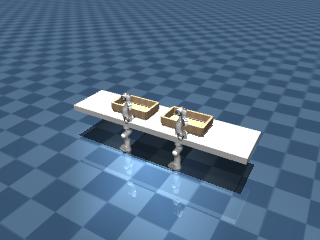

In [573]:
physics=mjcf.Physics.from_mjcf_model(sort_task)
#final_physics=mjcf.from_path('/home/vignesh/robot-collab_vig/rocobench/envs/assets/ur5e/ur5e_robotiq_full.xml')
pixels=physics.render()
PIL.Image.fromarray(pixels)

In [447]:
pixels.shape

(240, 320, 3)